In [5]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets

## Иллюстрация недообучения/переобучения

In [6]:
N_samples = 20
x = np.random.uniform(-10, 10.0, size=N_samples)
def f(x):
    return 0.2 * np.sin(12.0 / (0.14 * x ** 2 + 5))
y = f(x) + np.random.normal(0.0, 0.005, size=N_samples)

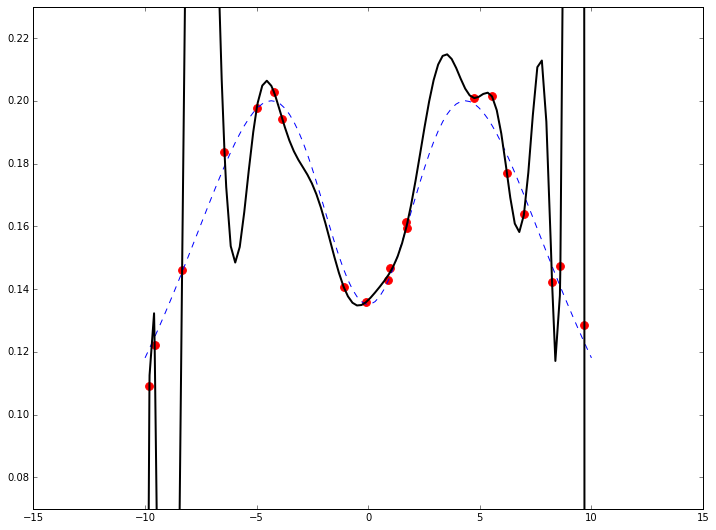

In [7]:
def learn(x, y, N):
    X = x[:, None] ** np.arange(N+1)    
    w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
    return w

def predict(x, w):
    N = w.size
    X = x[:, None] ** np.arange(N)
    
    return np.dot(X, w)

def plot(N):
    
    plt.figure(figsize=(12, 9))
    cx = np.linspace(-10, 10, 100)
    plt.plot(cx, f(cx), 'b--', linewidth=1)

    w = learn(x, y, N)
    sx = np.sort(np.concatenate([cx, x]))
    plt.plot(sx, predict(sx, w), 'k', linewidth=2)
    plt.scatter(x, y, marker='o', color='r', s=60)
    plt.ylim([0.07, 0.23])
    plt.show()
    
    
widgets.interact(plot, N=widgets.IntSlider(min=0, max=N_samples-1))

## Игрушечная задача классификации

In [8]:
toy = np.load('./toy.npz')
X, y = toy['X'], toy['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Задача 1. 
Вычислите коэффицент корреляции между каждым признаком и целевой переменной. 

Какой признак наиболее скоррелирован с целевой переменной?

Постройте на одном графике две гистограммы, отображающие распределение значений найденного признака среди объектов
первого и второго класса (для тренировочной выборки).

Попробуйте выдать найденный признак в качетве предсказания, какое значение AUC-ROC получает такой алгоритм на тренировочной и тестовой выборке?

## Задача 2.
Отобразите объекты тренировочной выборки на scatter-plot'e, используя  качестве осей $x$ и $y$ 0-ой и 4-ый признаки. Не забудьте выделить каждый класс своим цветом.

Можете ли вы улучшить разделение классификацию объектов используя выбранные признаки?

Попробуйте использовать в качетве предсказания линейную композицию 0-го и 4-го признаков с весами 2 и 3. 
($a(x) = 2 x_0 + 3x_4$).

Какое значение AUC-ROC  получает новый алгоритм на тренировочной и тестовой выборке?